# Rad 116ers - Assignment 03: Classification Models
Pre-requisites and libraries used: <br>
Python 3<br>
pandas<br>
matplotlib<br>
numpy<br>
Jupyter Notebook

## Member Assignments
### Fernando Mendez: Classification models on the provided dataset


### Ethan Tecson: Decision Tree Regressor, Vertebrate Dataset, Decision Tree Classifier


### Joshua Langley: Written report


### Calvin Chen: Feature Selection and Cross Validation


### Seungjin Chae: Supprting Vector Machine(SVM)


### Daniel Chu: Logic Regression, Naive Bayes


### Ryan Sario: Non-Linear Decision Boundary, K Nearest Neighbor, & Artificial Neural Network


### Sukhdeep Banwait:

# Classification Models via Tutorial 6
## Decision Tree Regressor

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv("Life Expectancy Data.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert the DataFrame back to a NumPy array
data_array = df.to_numpy()

# Selecting specific columns
x = data_array[1:, 3:4].astype(float)
y = data_array[1:, 7].astype(float)

print(x)
print(y)
print(x.shape)
print(y.shape)


[[59.9]
 [59.9]
 [59.5]
 ...
 [44.8]
 [45.3]
 [46. ]]
[73.52358168 73.21924272 78.1842153  ...  0.          0.
  0.        ]
(1648, 1)
(1648,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict([[3750]])
print("Predicted value: % d\n"%y_pred)

Predicted value:  2889



<ipython-input-23-da24cdf3bab8>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted value: % d\n"%y_pred)


In [ ]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(x), max(x), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Life expectancy to Percentage Expedenture on Health (Decision Tree Regressor)')
plt.xlabel('Life expectancy')
plt.ylabel('Percentage Expendeture on Health')
plt.show()

NameError: name 'np' is not defined

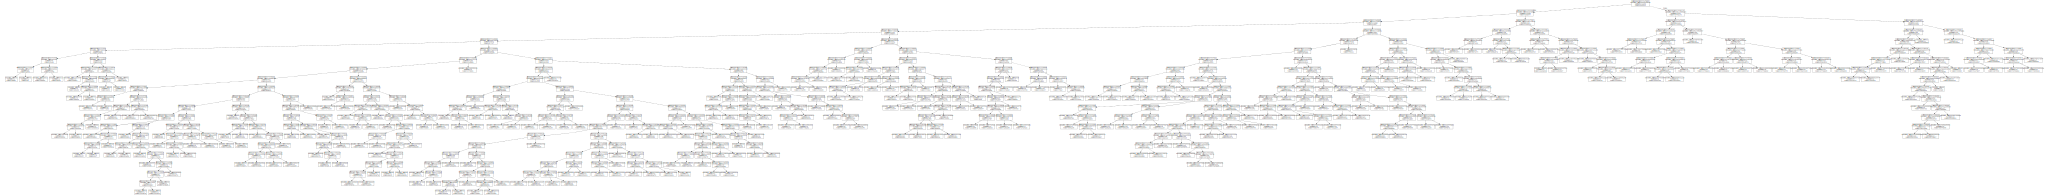

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['Life Expectancy'])
graph = graphviz.Source(dot_data)
graph

##Decision Tree Classifier

In [ ]:
import matplotlib.pyplot as plt

#Plot a confusion matrix
#cm is the confusion matrix, names are the names of the classes

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(names))
  plt.xticks(tick_marks, names, rotation=45)
  plt.yticks(tick_marks, names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')

##Vertebrate Dataset
We use a variation of the vertebrate data described in Example 3.1 of Chapter 3. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for “name”, the rest of the attributes have been converted into a one hot encoding binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [ ]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('Life Expectancy Data.csv', header='infer')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Given the limited number of training examples, suppose we convert the problem into a binary classification task (African vs Non-African Countries). We can do so by replacing the class labels of the instances to African Countries except for those that belong to the Non-African class.

In [ ]:
arrayLow = [i/10 for i in range(0, 101)]
arrayMed = [i/10 for i in range(101, 146)]
arrayHigh = [i/10 for i in range(146, 251)]
# for some reason the pandas library way for ranges was not working
data['Schooling'] = data['Schooling'].replace(arrayLow, 'Low Schooling')
data['Schooling'] = data['Schooling'].replace(arrayMed, 'Medium Schooling')
data['Schooling'] = data['Schooling'].replace(arrayHigh, 'High Schooling')
data


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
[10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5]
[14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2,

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,Medium Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,Low Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,Low Schooling
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,Low Schooling
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,Low Schooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,Low Schooling
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,Low Schooling
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,Low Schooling
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,Low Schooling


In [ ]:
import pandas as pd
import seaborn as sns

# Load data into a pandas DataFrame
df = pd.read_csv("Life Expectancy Data.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Define a function to classify countries into African and non-African
def classify_region(country):
    african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
    if country in african_countries:
        return 'African'
    else:
        return 'Non-African'

# Apply the classification function to create a new column
df['Region'] = df['Country'].apply(classify_region)

# Selecting specific columns
selected_columns = ['Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ',
                    'GDP', ' HIV/AIDS', 'percentage expenditure', 'Polio', 'Schooling',
                    'Region']

# Subsetting the data
data = df[selected_columns]

# Replace column values with 'African' and 'Non-African'
data.loc[:, 'Region'] = data['Region'].replace(['African', 'Non-African'], ['African', 'Non-African'])


# Paired plot using seaborn
sns.set()
sns.pairplot(data[['Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ',
                   'GDP', ' HIV/AIDS', 'percentage expenditure', 'Polio', 'Schooling',
                   'Region']],
             hue='Region', diag_kind="kde")



We can apply Pandas cross-tabulation to examine the relationship between the Alcohol and BMI attributes with respect to Aduly Mortality.

In [ ]:
pd.crosstab([data['Alcohol'], data[' BMI ']], data['Schooling'])

Schooling      High Schooling  Low Schooling  Medium Schooling
Alcohol  BMI                                                  
0.01    1.4                 0              1                 0
        1.8                 0              1                 0
        2.0                 0              0                 1
        2.1                 0              0                 2
        2.8                 0              0                 1
...                       ...            ...               ...
16.35   6.5                 1              0                 0
16.58   55.9                1              0                 0
16.99   56.7                1              0                 0
17.31   59.9                1              0                 0
17.87   56.3                1              0                 0

[2514 rows x 3 columns]

The results above show that it is not possible to distinguish the correlation of African vs Non-African countries and Mortality based on BMI and Alcohol consumption.

##Decision Tree Classifier
In this section, we apply a decision tree classifier to the country dataset described in the previous subsection.

In [ ]:
import pandas as pd
from sklearn import tree

# Create a list of dictionaries
data = [
    {'Alcohol': 1, ' BMI ': 25, 'Schooling': 'High School'},
    {'Alcohol': 2, ' BMI ': 30, 'Schooling': 'College'},
    {'Alcohol': 3, ' BMI ': 35, 'Schooling': 'Graduate School'}
]

# Create a DataFrame from the list of dictionaries
data = pd.DataFrame(data)

# Create the target variable
Y = pd.DataFrame(data, columns=['Schooling'])

# Create the feature matrix
X = data.drop(['Schooling'], axis=1)

# Fit the decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

In [ ]:
X

,Alcohol,BMI
0,1,25
1,2,30
2,3,35


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

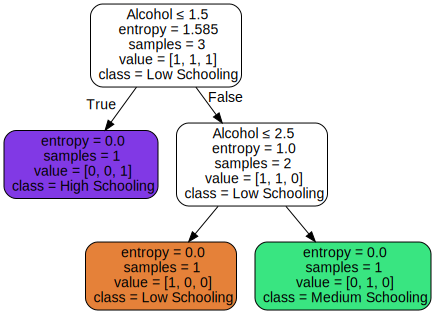

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['Low Schooling','Medium Schooling', 'High Schooling'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
testData = [[1, 2, 'Low Schooling'],[2,3,'Medium Schooling'],[3,4,'High Schooling']]
testData = pd.DataFrame(testData, columns=['BMI', 'Alcohol', 'Schooling'])
testData

,BMI,Alcohol,Schooling
0,1,2,Low Schooling
1,2,3,Medium Schooling
2,3,4,High Schooling


In [ ]:
testData = [[1, 2, 'Low Schooling'],[2,3,'Medium Schooling'],[3,4,'High Schooling']]
testData = pd.DataFrame(testData, columns=['BMI', 'Alcohol', 'Schooling'])
testData

,BMI,Alcohol,Schooling
0,1,2,Low Schooling
1,2,3,Medium Schooling
2,3,4,High Schooling


In [ ]:
import pandas as pd
testY = pd.DataFrame(testData, columns=['Schooling'])
testX = testData.drop(['Schooling'], axis=1)
predY = clf.predict(testX)
predictions = pd.concat([testData['Schooling'], pd.Series(predY, name='Predicted Class')], axis=1)
predictions

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Naïve Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

NameError: name 'X' is not defined

# Logistic Regression

In [ ]:
# This will prompt you to select a file. Choose your CSV file.
# The file will be stored in the dictionary `uploaded`, keyed by the file name.
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you know the file name or there's only one file
file_name = next(iter(uploaded))
data = pd.read_csv(file_name, header='infer')
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [ ]:
# Shuffle data
data = data.reindex(np.random.permutation(data.index))
data.reset_index(inplace=True, drop=True)


one_hot = pd.get_dummies(data['Geography'])
one_hot2 = pd.get_dummies(data['Gender'])
df = data.drop(['Geography', 'Gender'],axis = 1)
df = df.join(one_hot)
df = df.join(one_hot2)

# Normalize
normalize_numeric_minmax(df,'CreditScore')
normalize_numeric_minmax(df,'Age')
normalize_numeric_minmax(df,'Balance')
normalize_numeric_minmax(df,'EstimatedSalary')
normalize_numeric_minmax(df,'Tenure')
normalize_numeric_minmax(df,'NumOfProducts')

# Split data
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]
testData.reset_index(inplace=True, drop=True)
# drop useless columns
trainX = trainingData.drop(['RowNumber', 'CustomerId','Surname'] ,axis=1)
testX = testData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'] ,axis=1)

testY = pd.DataFrame(testData, columns=['Exited'])

NameError: name 'data' is not defined

##Linear Decision Boundary

In [ ]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50, 500]

SVMLtestAcc = []
SVMLtrainAcc = []
Y = pd.DataFrame(trainX, columns=['Exited'])
X = trainX.drop(['Exited'],axis=1)

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

NameError: name 'pd' is not defined

## Non-Linear Decision Boundary

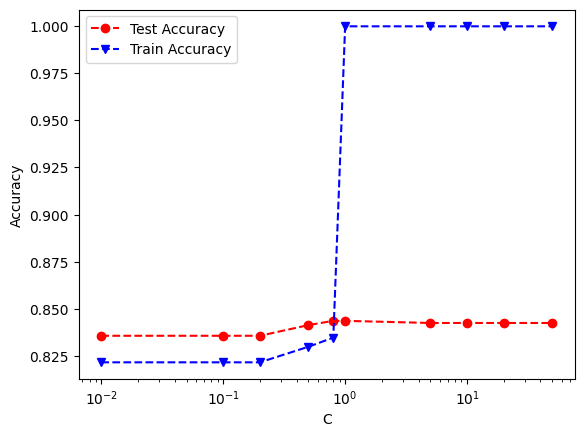

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Life_Expectancy_Data.csv')

# Handle missing values for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Assuming the target is in the last column, adjust as necessary
X = data.iloc[:, :-1]  # All columns except the last one as features
Y = data.iloc[:, -1]  # Last column as the target

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)

# List of C parameters for SVM
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

# Lists to store accuracies
SVMLtestAcc = []
SVMLtrainAcc = []

# Train the model and evaluate it
for param in C:
    clf = SVC(C=param, kernel='rbf', gamma='auto')
    clf.fit(trainX, trainY)
    svml_pred = clf.predict(testX)
    svml_pred_train = clf.predict(trainX)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(trainY, svml_pred_train))

# Plotting the accuracies
plt.plot(C, SVMLtestAcc, 'ro--', C, SVMLtrainAcc, 'bv--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()


## K Nearest Neightbor (KNN) Classifier

[ True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
  True  True  True False False  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True  True  True False
  True  True False  True  True  True  True False  T

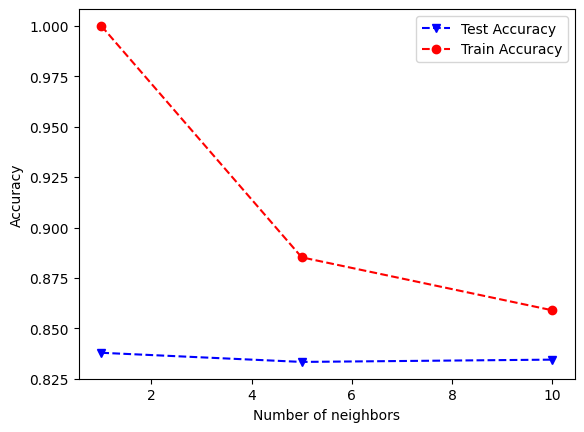

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Handle missing values for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Assuming the target is in the last column, adjust as necessary
X = data.iloc[:, :-1]  # All columns except the last one as features
Y = data.iloc[:, -1]  # Last column as the target

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# KNN Configuration
numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

# Train and evaluate the KNN classifier
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    print(knn_pred)
    testAcc.append(accuracy_score(Y_test, knn_pred))
    trainAcc.append(accuracy_score(Y_train, knn_pred_train))

# Plotting the results
plt.plot(numNeighbors, testAcc, 'bv--', numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


**Artificial Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report

# Function to encode categorical text data into dummy variables
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Function to encode categorical text values to indexes
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = [x for x in df.columns if x != target]
    target_type = df[target].dtype
    if target_type in (np.int64, np.int32):
        dummies = pd.get_dummies(df[target])  # Classification
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)  # Regression

# Load your dataset
data_df = pd.read_csv('Life Expectancy Data.csv')

# Check and drop the 'Name' column if it exists
if 'Name' in data_df.columns:
    data_df = data_df.drop('Name', axis=1)

# Check and replace values in the 'Class' column if it exists
if 'Class' in data_df.columns:
    data_df['Class'] = data_df['Class'].replace(['fishes', 'birds', 'amphibians', 'reptiles'], 'non-mammals')
    Classes = encode_text_index(data_df, 'Class')

# Prepare training data
if 'Class' in data_df.columns:
    X, Y = to_xy(data_df, 'Class')
else:
    # If no 'Class' column, choose another column as the target
    print("Please specify the target column.")
    exit(1)

# Define the model
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(Y.shape[1], activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, Y, verbose=2, epochs=100)

# Example test data handling, ensure the test data is available and correctly formatted
# testData = [['example', 0, 0, 0, 0, 1, 1, 'non-mammals'], ...]
# testData = pd.DataFrame(testData, columns=data_df.columns)  # Assuming the columns match
# testData = testData.drop('Name', axis=1, errors='ignore')
# encode_text_index(testData, 'Class')
# testX, testY = to_xy(testData, 'Class')

# Model prediction and evaluation (uncomment and adjust as needed)
# pred = model.predict(testX)
# pred = np.argmax(pred, axis=1)
# true = np.argmax(testY, axis=1)
# print('Accuracy on test data is %.2f' % accuracy_score(true, pred))
# print(classification_report(true, pred, target_names=Classes))


Please specify the target column.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


UnimplementedError: Graph execution error:

Detected at node categorical_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-30-cf4dc23c0de1>", line 62, in <cell line: 62>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2198, in categorical_crossentropy

Cast string to float is not supported
	 [[{{node categorical_crossentropy/Cast}}]] [Op:__inference_train_function_1019]

# Feature Selection


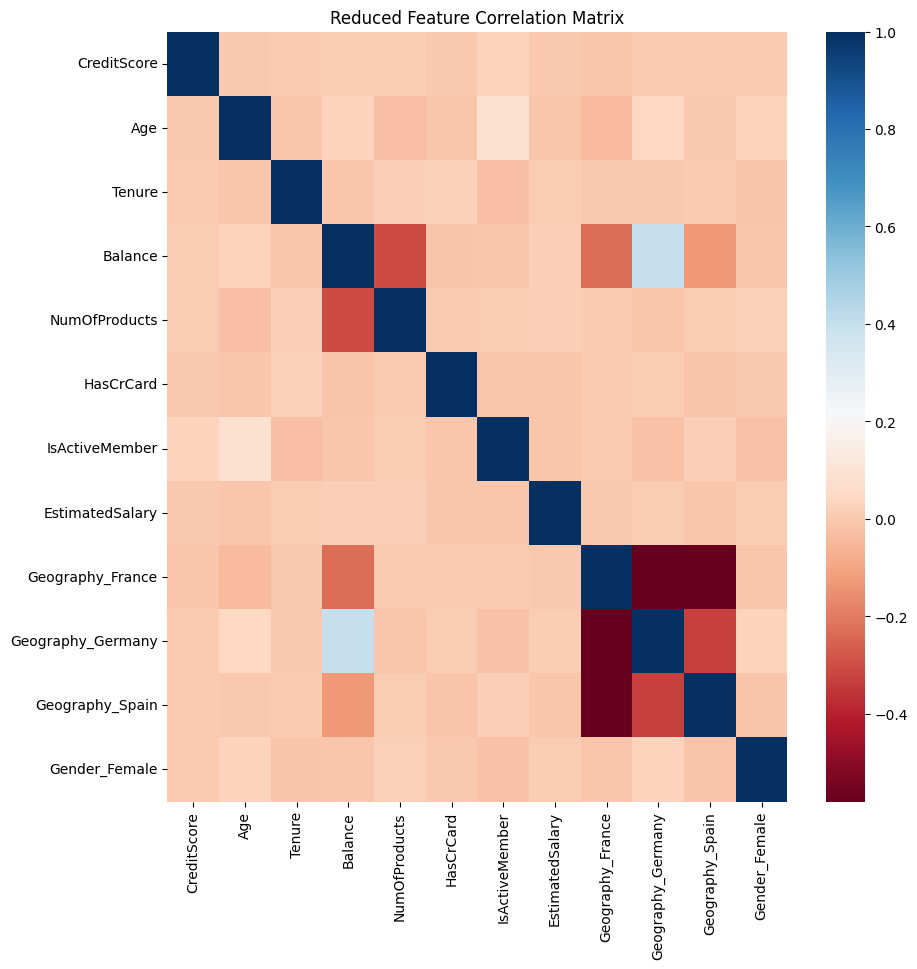

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"/content/sample_data/Churn_Modelling.csv")
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columns=columns_to_drop, inplace=True)

# Convert categorical variables to dummy variables for correlation analysis
data_encoded = pd.get_dummies(data.drop('Exited', axis=1))

# Correlation matrix
corr_matrix = data_encoded.corr().abs()

# Pairs of highly correlated features
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Drop one of each pair of highly correlated features
for var_pair in high_corr_var:
    data_encoded.drop(var_pair[1], axis=1, inplace=True)

# Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data_encoded.corr(), annot=False, cmap='RdBu')
plt.title('Reduced Feature Correlation Matrix')
plt.show()


# Cross Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv(r"/content/sample_data/Churn_Modelling.csv")
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columns=columns_to_drop, inplace=True)

# Make Exited column feature
X = data.drop('Exited', axis=1)
y = data['Exited']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Create preprocessing components
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_encoded.select_dtypes(exclude=['int64', 'float64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_encoded, y, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation accuracies: [0.811  0.8085 0.8085 0.818  0.8025]
Mean CV accuracy: 0.8097


# Running the classification models on the provided dataset


**Decision Tree Regressor**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

df.dropna(inplace=True)
df = df.drop(['RowNumber'], axis=1)

array = df.to_numpy()

X = array[:, 2:3].astype(int)
y = array[:, 11]

print(X)
print("\n")
print(y)

[[619]
 [608]
 [502]
 ...
 [709]
 [772]
 [792]]


[101348.88 112542.58 113931.57 ... 42085.58 92888.52 38190.78]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_predic = regressor.predict([[300]])
print("Predicted Salary:", y_predic)

Predicted Salary: [145503.35]


<ipython-input-6-1fb754aae298>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 5)


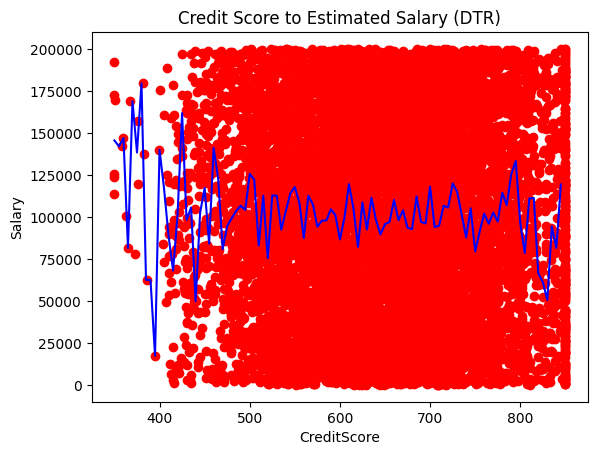

In [ ]:
X_grid = np.arange(min(X), max(X), 5)

X_grid = X_grid.reshape((len(X_grid), 1))


plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Credit Score to Estimated Salary (DTR)')
plt.xlabel('CreditScore')
plt.ylabel('Salary')
plt.show()

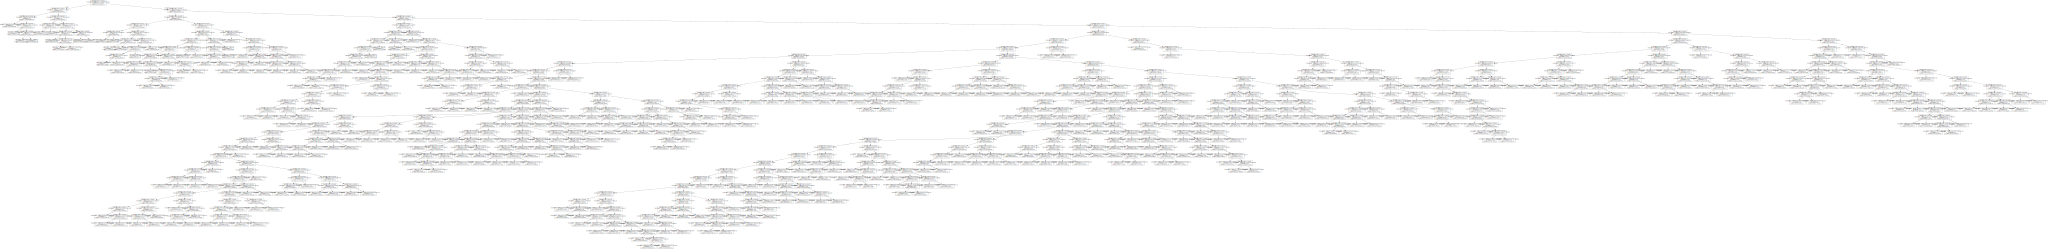

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['Credit Score'])
graph = graphviz.Source(dot_data)
graph

**For Decsision Tree Classifier**

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def plot_confusion_matrix(cm, names, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("/content/sample_data/Churn_Modelling.csv", header='infer')
data = data.drop(['RowNumber'], axis=1)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Setting Credit Scores that are less than 649 to "Low Score" and "High Score" to credit scores above 650

In [ ]:
low = []
l = 350

high = []
h = 650

for n in range(300):
  low.append(l)
  l+= 1

for n in range(201):
  high.append(h)
  h+=1

data['CreditScore'] = data['CreditScore'].replace(low, 'Low Score')
data['CreditScore'] = data['CreditScore'].replace(high, 'High Score')

data


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,Low Score,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,Low Score,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,Low Score,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,High Score,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,High Score,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,High Score,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,Low Score,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,High Score,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,High Score,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


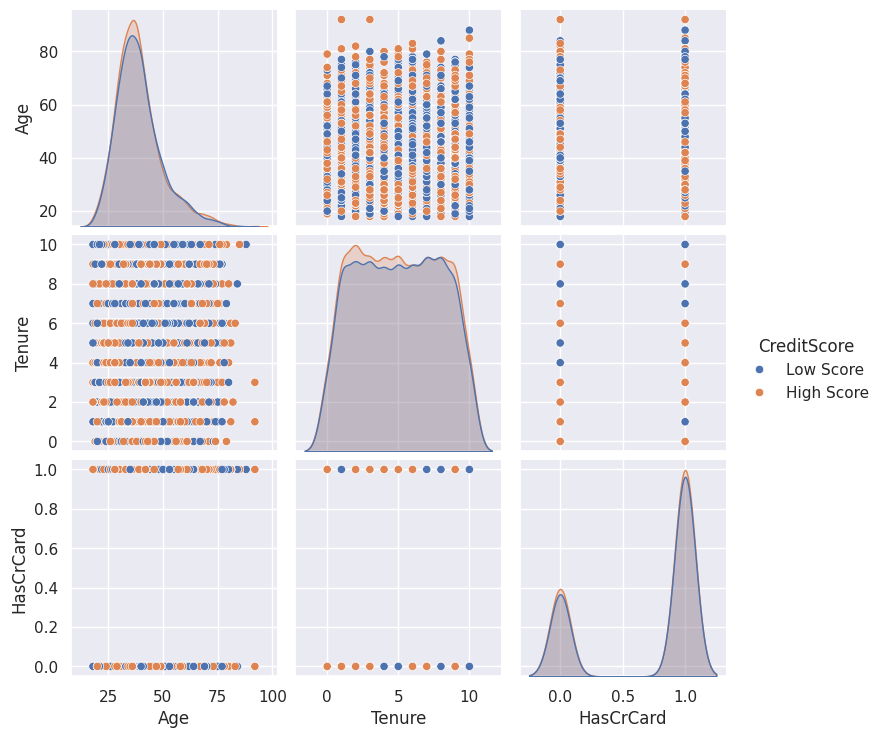

In [ ]:
sns.set()
sns.pairplot(data[['Geography', 'Age', 'Tenure','HasCrCard', 'CreditScore']], hue='CreditScore', diag_kind="kde")

In [ ]:
pd.crosstab([data['HasCrCard'], data['EstimatedSalary']],data['CreditScore'])

CreditScore                High Score  Low Score
HasCrCard EstimatedSalary                       
0         90.07                     0          1
          91.75                     0          1
          417.41                    0          1
          479.54                    1          0
          502.70                    1          0
...                               ...        ...
1         199857.47                 1          0
          199909.32                 0          1
          199929.17                 0          1
          199953.33                 0          1
          199970.74                 0          1

[9999 rows x 2 columns]

In [ ]:
from sklearn import tree
Y = pd.DataFrame(data, columns=['CreditScore'])
X = data.drop(['CustomerId','Surname','CreditScore','Geography','Gender'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)


In [ ]:
X

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0
9996,35,10,57369.61,1,1,1,101699.77,0
9997,36,7,0.00,1,0,1,42085.58,1
9998,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

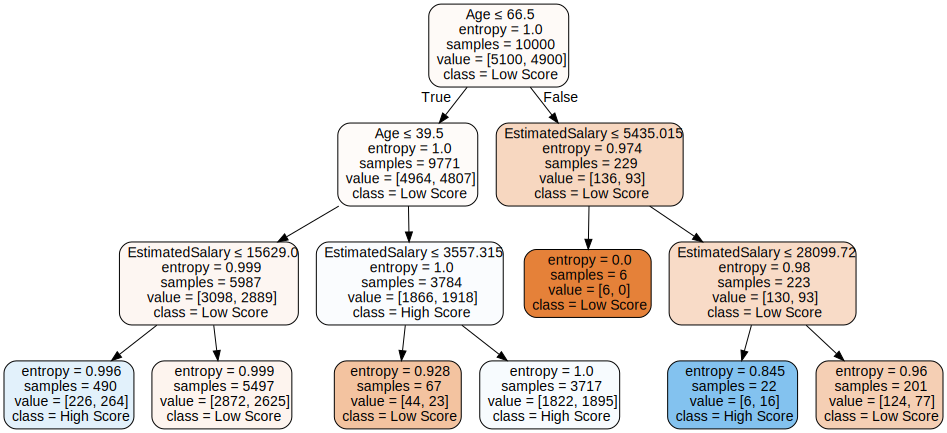

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['Low Score', 'High Score'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
testData = [['1','Doe','High Score','France','Female','40','2','9324.23','1','1','1','100332.12','1'],
            ['2','Jessie','High Score','Spain','Female','44','2','6542.15','1','0','1','90332.15','1'],
            ['3','Zoey','Low Score','Germany','Female','23','1','589741.12','0','1','1','16542.90','1'],
            ['4','Tom','Low Score','Spain','Male','35','1','5983.3','0','1','0','45812.85','1']]

testData = pd.DataFrame(testData, columns=data.columns)
testData

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Doe,High Score,France,Female,40,2,9324.23,1,1,1,100332.12,1
1,2,Jessie,High Score,Spain,Female,44,2,6542.15,1,0,1,90332.15,1
2,3,Zoey,Low Score,Germany,Female,23,1,589741.12,0,1,1,16542.90,1
3,4,Tom,Low Score,Spain,Male,35,1,5983.3,0,1,0,45812.85,1


In [ ]:
testY = pd.DataFrame(testData, columns=['CreditScore'])
testX = testData.drop(['CustomerId','Surname','CreditScore','Geography','Gender'], axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Surname'], pd.Series(predY, name='Predicted')], axis=1)
predictions

,Surname,Predicted
0,Doe,Low Score
1,Jessie,Low Score
2,Zoey,High Score
3,Tom,High Score


[[0 2]
 [2 0]]
Accuracy on test data is 0.00
F1 score on test data is 0.00
Precision Score on test data is 0.00
Recall score on test data is 0.00
              precision    recall  f1-score   support

  High Score       0.00      0.00      0.00       2.0
   Low Score       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



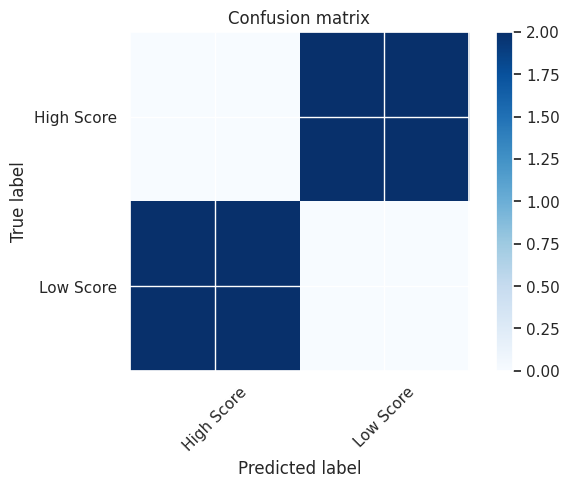

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(testY, predY)
print(confusion)

plot_confusion_matrix(confusion, testY['CreditScore'].unique(), title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY,pos_label='High Score')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY,pos_label='High Score')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY,pos_label='High Score')))
print( classification_report(testY,predY))

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(testX)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

['Low Score' 'Low Score' 'High Score' 'Low Score']
Accuracy on test data is 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['Low Score' 'High Score' 'High Score' 'High Score']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['High Score' 'Low Score' 'High Score' 'High Score']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['High Score' 'High Score' 'High Score' 'High Score']


Text(0, 0.5, 'Accuracy')

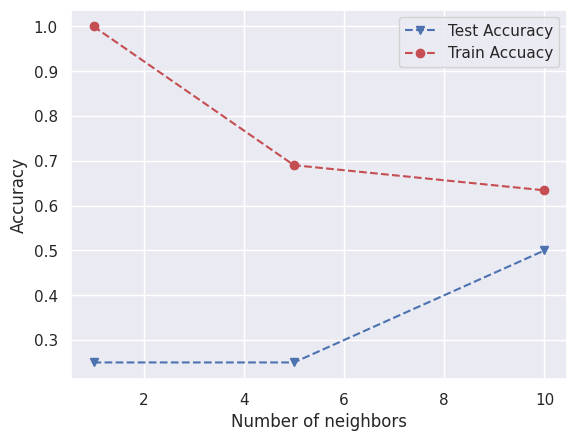

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y)
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Written report
##Decision Tree Regressor:
The dataset chosen was a CSV of life expectancy data with all incomplete entries removed. For X, the life expectancy column was chosen while for Y, percentage expenditure was chosen. With those two values, a decision tree regressor with random state 0 was chosen to fit on X and Y. As a result, the predicted value was 2889. Afterwards, X is gridded after being arranged between its minimum and maximum values with a difference of 0.01 between two consecutive angles. It is then reshaped to make a column out of its values.

##Decision Tree Classifier:
A confusion matrix is used and interpolated to the nearest.

##Vertebrate Dataset:
As explained in the notebook, the vertebrate data is used to partition schooling into three levels of quality (Low, Medium, & High - not in that order). The output is dependent on the alcohol and BMI levels. Then, afterwards, a decision tree classifier is implemented on the previous subsection. This shows the levels of alcohol in relation to the BMI. This allows a decision tree to be manufactured.

##Logistic Regression:
Logistic Regression is applied on a churn modelling dataset. This is done by normalizing the numeric minmax, then shuffling the data, then normalizing it.

##Linear Decision Boundary:
A linear decision boundary is applied on the churn modelling dataset. Then, for Non-Linear Decision Boundary, it is applied on the life expectancy data dataset. Unlike before, missing values are filled with the mean data of the numeric columns. The data is then trained, tested, and fit to a list of C parameters. It was then plotted with respect to test accuracy and train accuracy, with an X-axis of the varying C-values and Y-axis of accuracy. As seen, the closer to 1 that is gotten, the better the train accuracy.

##Feature Selection:
Feature selection was run on the churn modelling dataset. Categorical variables are converted into dummy variables and the resulting encoded data is run through a correlation matrix. It then finds pairs of highly correlated features, and then drops one of the members of each pair. The resulting dataset is then put into a correlation matrix.

##Cross Validation:
Using the churn modelling, the column feature is the Exited column and X is encoded with dummy variables. It is preprocessed, then a pipeline with preprocessing and logistic regression is created. It With the resulting pipeline, CV scores are created and printed.